In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("kdd_test.csv")

In [5]:
print("TRAINING SET :")
print(train.head(4), end="\n\n\n\n\n\n")
print("TEST SET :")
print(test.head(4))

TRAINING SET :
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   

In [6]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.0,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,258.858499,1.226873e+04,2.966787e+03,0.000089,0.016989,0.000177,0.155562,0.008783,0.406095,0.259359,0.002040,0.001065,0.278034,0.009226,0.000710,0.004125,0.0,0.000044,0.014594,83.706840,28.981769,0.230727,0.229840,0.157362,0.157140,0.681482,0.072189,0.094348,186.878549,123.129613,0.545571,0.084905,0.141117,0.028275,0.229375,0.225729,0.155008,0.153560
std,2184.355090,4.665783e+05,6.293205e+04,0.009419,0.217507,0.016313,1.699324,0.104942,0.491114,11.370701,0.045126,0.045160,12.577777,0.369397,0.031232,0.097572,0.0,0.006660,0.119922,119.550577,78.419968,0.415721,0.416817,0.357695,0.359364,0.434233,0.206945,0.254145,97.508604,111.577695,0.447079,0.199813,0.305538,0.105966,0.410665,0.412500,0.339255,0.350511
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,95.000000,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,12.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,85.000000,0.670000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.750000e+02,5.950000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,140.000000,17.000000,0.070000,0.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.100000,0.010000,0.010000,0.000000
max,54451.000000,6.282565e+07,5.153771e+06,1.000000,3.000000,2.000000,30.000000,5.000000,1.000000,796.000000,1.000000,2.000000,878.000000,43.000000,2.000000,8.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

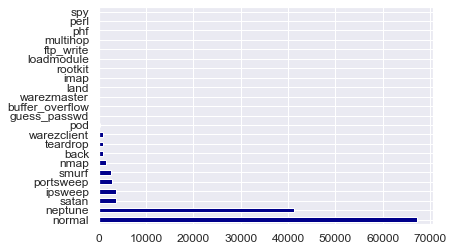

In [8]:
# since the column is redundant
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

# dropping ALL duplicte values 
test.drop_duplicates(keep = False, inplace = True) 

train['labels'].value_counts().plot(kind='barh', color='darkblue')

# SCALING PROCESS

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = train.select_dtypes(include=['object']).copy()
cattest = test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['labels'], axis=1)
cat_Ytrain = traincat[['labels']].copy()

In [11]:
# naming train and test sets
train_x = pd.concat([sc_traindf,enctrain],axis=1)
train_y = train['labels']
train_x.shape

(125973, 40)

In [12]:
test_df = pd.concat([sc_testdf,testcat],axis=1)
test_df.shape

(22544, 41)

# FEATURE SELECT

<AxesSubplot:xlabel='Feature'>

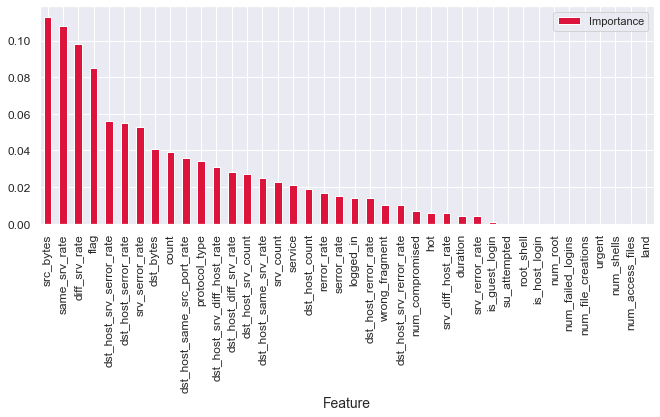

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# fit random forest classifier on the training set
rfc.fit(train_x, train_y)
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'Feature':train_x.columns,'Importance':score})
importances = importances.sort_values('Importance',ascending=False).set_index('Feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar(color='crimson')

In [14]:
import itertools
from sklearn.feature_selection import RFE

# selecting features
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'protocol_type',
 'flag']

# SPLIT THE DATASET

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.70, random_state=2)

# IMPORT AND TRAIN ML MODELS

In [14]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train)

# Train Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
#Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# EVALUATION

In [15]:
from sklearn import metrics

models=[]
acc_list1=[]
models.append(('Naive Bayes Classifier', BNB_Classifier))
models.append(('Random Forest', rfc))
models.append(('Decision Tree', DTC_Classifier))
models.append(('KNeighbours', KNN_Classifier))


for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    acc_list1.append(accuracy);
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Bayes Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8765380582672039

Model Accuracy:
 0.8762658622605777

Confusion matrix:
 [[  640     0     0     5     0     0     0     0     0     0     0    13
      0     0     0     0     0     0     0     0     0     0     0]
 [    0    15     0     0     0     0     0     0     0     0     0     3
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     1     0     0     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     1     0]
 [    0     0     0    35     1     0     0     0     0     0     0     2
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     9     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     1     0  2116     0     0     0     0    27    48
 


============================== Decision Tree Model Evaluation ==============================

Cross Validation Mean Score:
 0.9975504971057895

Model Accuracy:
 0.9999092775087604

Confusion matrix:
 [[  658     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0    18     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     3     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0    38     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0    10     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0  2476     0     0     0     0     0     0
      0   

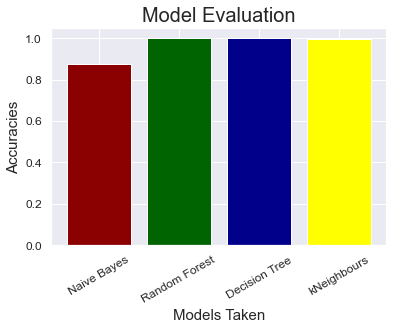

In [30]:
model_names=['Naive Bayes', 'Random Forest' , 'Decision Tree', 'kNeighbours']
index = np.arange(len(model_names))
plt.bar(index, acc_list1, color=['darkred', 'darkgreen', 'darkblue', 'yellow'])
plt.xlabel('Models Taken', fontsize=15)
plt.ylabel('Accuracies', fontsize=15)
plt.xticks(index, model_names, fontsize=12, rotation=30)
plt.title('Model Evaluation', fontsize=20)
plt.show()

# VALIDATION

In [31]:
acc_list2=[]
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    acc_list2.append(accuracy);
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Bayes Classifier Model Test Results ==============================

Model Accuracy:
 0.8722480948348857

Confusion matrix:
 [[  288     0     0     2     0     0     0     0     0     0     0     8
      0     0     0     0     0     0     0     0     0     0]
 [    0     8     0     0     0     0     0     0     0     0     0     4
      0     0     0     0     0     0     0     0     0     0]
 [    0     1     0     0     0     0     0     0     0     0     0     3
      0     0     0     1     0     0     0     0     0     0]
 [    0     0     0    15     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     1     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   960     0     0     0     0    18    18
      0     0   127     0     0     0     0     0     0     0]
 [    0     0   


============================== Decision Tree Model Test Results ==============================

Model Accuracy:
 0.9972745554614734

Confusion matrix:
 [[  297     0     0     0     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0]
 [    0     4     0     0     0     0     0     0     0     0     0     6
      0     0     0     0     0     0     0     0     0     2]
 [    0     0     2     0     0     0     0     0     0     0     0     3
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0    15     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0  1118     0     0     0     0     4     1
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0

# ANN


In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [17]:
model = Sequential([
    Dense(40,input_shape=(40,),activation="relu"),
    Dense(30,activation="relu"),
    Dense(40,activation="softmax")
])
model.summary()
model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1640      
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
Total params: 4,110
Trainable params: 4,110
Non-trainable params: 0
_________________________________________________________________


In [20]:
#Since,the dataset is very big and we cannot fit complete data at once so we use batch size.
#This divides our data into batches each of size equal to batch_size.
#Now only this number of samples will be loaded into memory and processed. 
#Once we are done with one batch it is flushed from memory and the next batch will be processed.
model7 = KerasClassifier(build_fn=fun,epochs=10,batch_size=10)

NameError: name 'fun' is not defined

In [19]:

model7.fit(X_train, Y_train.values.ravel())


NameError: name 'model7' is not defined